# Data Structures Course 
Shiraz University Fall 2024    
Reza Rezazadegan   
www.dreamintelligent.com 

# 2- Maps

As opposed to the sequence interface which we studied in the last chapter, in Maps, the order of items is interinsic. 
The items in a Map (such as `x`) have two components a **key** (`x.key`) and **value** (`x.value`). For example, the key can be the students' identificatin number and value may be their name or average grade. Similar to a mathematicsl function, given the key, we want to find the corresponding value. Therefore, indices (extrinsic order) is irrelevant for maps. 

In any Map, items are kept according to their intrinsic order and therefore there you cannot use indices with them, even though you can have a `for` loop that goes over the Map's elements one by one. You can imagine an example of a Map to be of the following form:

` S={("Ali", 09176542372), ("Jamshid", 09122243687), ("Mehdi", "09134265274")}
`

Here the key is the name and value is phone number.  
The items in a set _are sorted by key_.  


Note that in a Map, keys are unique and only one element with a given key can exist. 


Examples of data structures based on the Map interface include Python's `set` and `dict` data structures. 


- Python `dict`: is a type of Set where both `key` and `value` are present. 


In [3]:
S={"Ali": 9176542372, "Jamshid": 9122243687, "Mehdi": 9134265274}
S.keys()


dict_keys(['Ali', 'Jamshid', 'Mehdi'])

In [4]:
S.values()

dict_values([9176542372, 9122243687, 9134265274])

In [5]:
S.items()

dict_items([('Ali', 9176542372), ('Jamshid', 9122243687), ('Mehdi', 9134265274)])

In [6]:
S["Ali"]=214572349


dict_items([('Ali', 214572349), ('Jamshid', 9122243687), ('Mehdi', 9134265274)])

 

- Python `set`: in a Python set, the key and value are the same!




In [28]:
Z={"Mehdi", "Farzaneh"}

In [29]:
Z[0]

TypeError: 'set' object is not subscriptable

In [24]:
Z.add("Mehdi")
Z

{'Farzaneh', 'Mehdi'}

## Map interface specifications
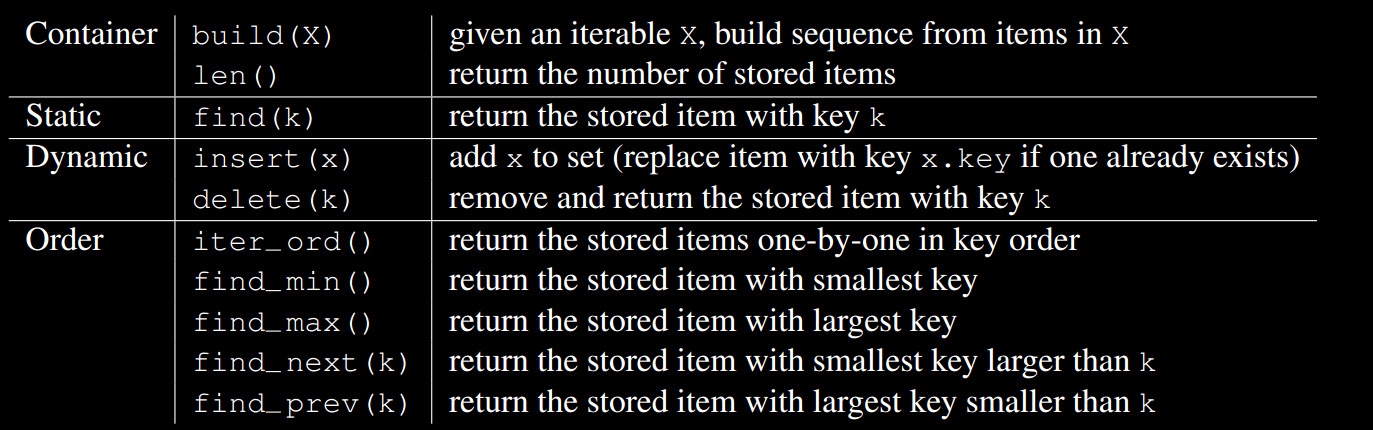




We will consider 3 different implementations of the set:
- Using an array: the items are stored in the array in an unsorted way however the items are retrieved according to their order! No item is allowed to be added to this array twice.
- Using a sorted array: the items are kept in an array which is sorted from the beginning and is kept sorted throughout. 
- Using a hash table (Chapter 4)


## More on the ordering of elements
Since we need an order on the elements of a Map, we take a closer look at order in Python.

In [30]:
3<3.14

True

For strings, tuples and lists, Python uses _lexicographic order_ which means two items `s1`, `s2` are compared basd on their first component (or character) `s1[0], s2[0]` and if these two are equal then Python compares `s2[1], s2[1]` and so on.

In [11]:
"Reza" < "Rosa"

True

In [3]:
"Reza"<"Rezazadegan"

True

In [4]:
"Reza" < "Rexona"

False

In [5]:
(0,1) < (0,2)

True

In [7]:
[0,1] < [0,2]

True

In [9]:
[0,1] <[0,1,2]

False

In [10]:
[0,1,0] <[0,1]

False

Note also that you can give your own order function to Python list's `sort` function, using its `key` argument.


If you define a new class, you can define ("overload") the comparinson operators, by defning the following member functions for your class: `__lt__`, `__le__`, `__gt__`, `__ge__`, `__eq__` and `__ne__`.

In [31]:
class map_element:
    def __init__(self, key, value):
        self.key=key
        self.value=value

    # Operator ==
    def __eq__(self, right):
        return self.key==right.key and self.value==right.value
    
    # Operator <
    def __lt__(self, right):
        return self.key < right.key

In [32]:
A=map_element("Akbar", 9)
B=map_element("Asghar", 2)

A<B

True

In [3]:
A

## Implementation of the Set ADT using sequences
The set data structure can be obtained from the sequence DS; we only have to make sure that no item is added to a set twice. However this implementation is not efficient.

In [ ]:
from Array import Dynamic_Array #, Linked_List 
class map_from_seq:
    def __init__(self): 
        self.S = Dynamic_Array() # Can use a Linked_List instead
        
    def __len__(self): 
        return len(self.S)
    
    # Iterator used when you invoke `for x in S`
    def __iter__(self): 
        yield from self.S

    def build(self, A): # Problem of adding an element twice
        self.S.build(A)

    def insert(self, x):
        for i in range(len(self.S)):
            if self.S.get_at(i).key == x.key:
                self.S.set_at(i, x)
                return
        self.S.insert_last(x)

    def delete(self, key):  #for linked lists no efficient
        for i in range(len(self.S)):
            if self.S.get_at(i).key == key:
                return self.S.delete_at(i)
    
    def find(self, key):
        for x in self.S:
            if x.key == key: 
                return x
        return None
    
    # Defining (overloading) the `in` operator for sets
    def __contains__( self, key ):
        return self.find(self, key)!=None  
    
    def find_min(self):
        out = None
        for x in self:
            if (out is None) or (x.key < out.key):
                out = x
        return out

    def find_max(self):
        out = None
        for x in self:
            if (out is None) or (x.key > out.key):
                out = x
        return out

    # Finds the element whose key is immediately larger than k
    def find_next(self, k):
        out = None
        for x in self:
            if x.key > k:
                if (out is None) or (x.key < out.key):
                    out = x
        return out

    def find_prev(self, k):
        out = None
        for x in self:
            if x.key < k:
                if (out is None) or (x.key > out.key):
                    out = x
        return out
    # Iterates on the elements of the set in order, from min to maxS
    def iter_ord(self):
        x = self.find_min()
        while x:
            print("in the while loop!")
            yield x
            x = self.find_next(x.key)
    
    
    


In [13]:
X=map_from_seq()

In [14]:
X.insert(A)

In [15]:
X.insert(B)

In [16]:
for x in X:
    print(x.key, x.value)

Akbar 9
Asghar 2


In [17]:
X.delete("Akbar")
len(X)

1

In [21]:
X.find("Asghar")

In [19]:
X.find("Akbar")

Complexity of Map operations when implemented using unsorted arrays:
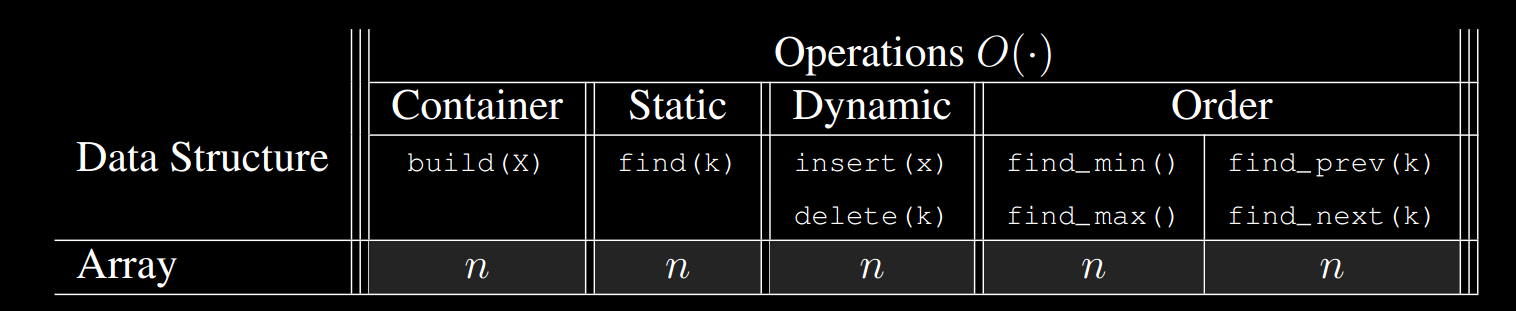

Using a sorted array:
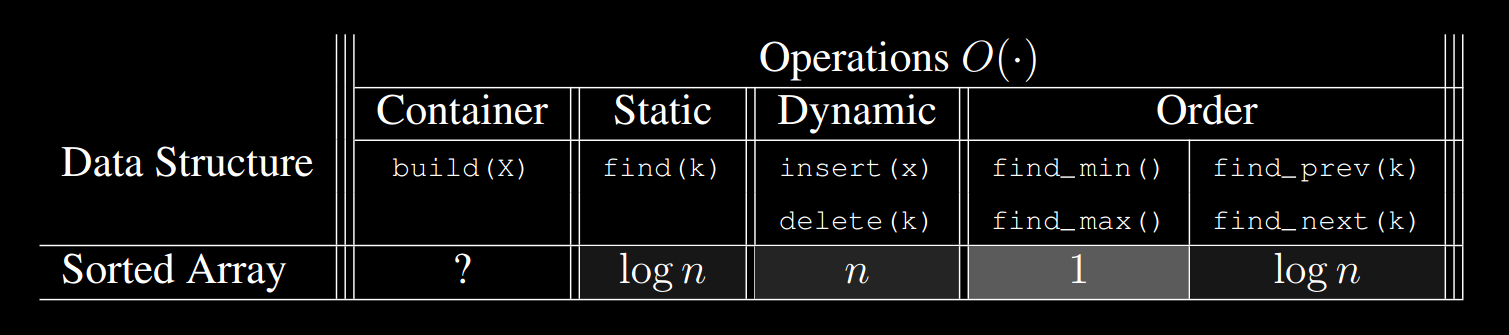

In [ ]:
class Sorted_Array_Map:
    def __init__(self): 
        self.A = Dynamic_Array() # O(1)
    def __len__(self): 
        return len(self.A) # O(1)
    def __iter__(self): 
        yield from self.A # O(n)
    def iter_order(self): 
        yield from self # O(n)
    
    def build(self, X): # O(?)
        self.A.build(X)
        self._sort()

    def _sort(self): # O(?)
        ??

    def _binary_search(self, key, i, j): # O(log n)
        if i >= j: 
            return i
        
        m = (i + j) // 2
        x = self.A.get_at(m)
        if x.key > key: 
            return self._binary_search(key, i, m - 1)
        if x.key < key: 
            return self._binary_search(key, m + 1, j)

        return m
    
    def find_min(self): # O(1)
        if len(self) > 0: 
            return self.A.get_at(0)
        else: 
            return None
    
    def find_max(self): # O(1)
        if len(self) > 0: 
            return self.A.get_at(len(self) - 1)
        else: 
            return None
    
    def find(self, k):      # O(log n)
        if len(self) == 0: 
            return None
        i = self._binary_search(k, 0, len(self) - 1)
        x = self.A.get_at(i)
        if x.key == k: return x
        else: return None
    
    # Finds the element whose key is immediately greater than k, if it exists
    def find_next(self, k): # O(log n)
        if len(self) == 0: 
            return None
        i = self._binary_search(k, 0, len(self) - 1)
        x = self.A.get_at(i)
        if x.key > k: 
            return x
        if i + 1 < len(self): 
            return self.A.get_at(i + 1)
        else: 
            return None
    
    def find_prev(self, k): # O(log n)
        if len(self) == 0: return None
        i = self._binary_search(k, 0, len(self) - 1)
        x = self.A.get_at(i)
        if x.key < k: return x
        if i > 0: return self.A.get_at(i - 1)
        else: return None
    
    def insert(self, x): # O(n)
        if len(self.A) == 0:
            self.A.insert_first(x)
        else:
            i = self._binary_search(x.key, 0, len(self.A) - 1)
            k = self.A.get_at(i).key
        
        if k == x.key:
            self.A.set_at(i, x)
            return False
        
        if k > x.key: 
            self.A.insert_at(i, x)
        else: 
            self.A.insert_at(i + 1, x)
        
        return True
    
    def delete(self, k): # O(n)
        i = self._binary_search(k, 0, len(self.A) - 1)
        assert self.A.get_at(i).key == k, "Key does not exist in the set."
        return self.A.delete_at(i)
    
    
        

## Exercises
1- If the Map ADT is implemented using ordinary arrays, implement the `__eq__` function (which overloads, or defines the `==` operator) for sets. It takes two arguments: `self`and the other set.  

2- Write a function that takes two maps (implemented as ordered arrays) and returns their difference, i.e. the set of elements which is in one but not in the other.  

3- Implement the bracket operator `[]` for the Set (first implementation) that, similar to a Python `dict`, takes a key and returns the corresponding value, if the key exists in the Set. Test your code with an example.